In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

from utils.displayData import displayData
from utils.lrCostFunction import lrCostFunction
from utils.oneVsAll import oneVsAll
from utils.predictOneVsAll import predictOneVsAll

Loading and Visualizing Data ...


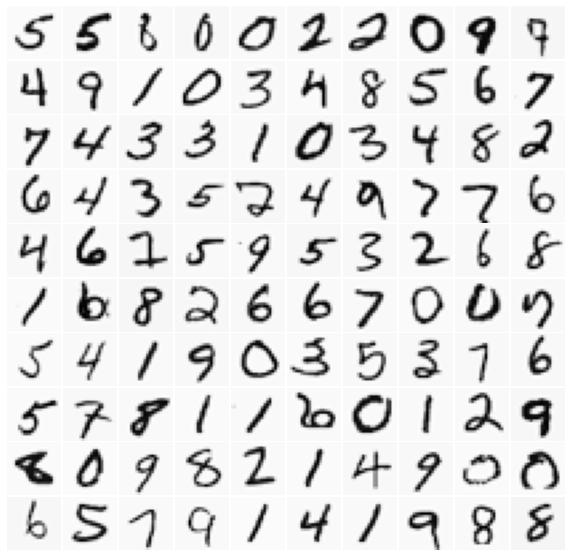

In [2]:
print("Loading and Visualizing Data ...")

data = sio.loadmat("ex3data1.mat")
X = data["X"]
y = data["y"]

row,col = X.shape

rand_indices = np.random.permutation(row)
sel = X[rand_indices[:100]]

displayData(sel)

In [3]:
print("Testing lrCostFunction() with regularization\n")

theta_t = np.array([-2, -1, 1, 2]).reshape(4,)

X_0 = np.ones((5,1))
X_test = (np.arange(1,16).reshape(5,3,order="F")) / 10
X_t = np.concatenate((X_0,X_test),axis=1)
y_t = np.array([1,0,1,0,1]).reshape(-1)
l = 3

J,grad = lrCostFunction(theta_t, X_t, y_t, l);

print('Expected cost: 2.534819')
print('Calucalted cost: {:.6f}\n'.format(J))

print('Expected Gradients:\n');
print(' 0.146561\n -0.548558\n 0.724722\n 1.398003\n')

print('Calculated gradients:\n');
print('{}\n{}\n{}\n{}\n'.format(*grad))

Testing lrCostFunction() with regularization

Expected cost: 2.534819
Calucalted cost: 2.534819

Expected Gradients:

 0.146561
 -0.548558
 0.724722
 1.398003

Calculated gradients:

0.14656136792489802
-0.5485584118531603
0.7247222721092885
1.3980029560717375



In [4]:
data = sio.loadmat("ex3data1.mat")


X = data["X"]
y = data["y"].reshape(-1)
y = np.where(y==10,0,y)

l = 0.1
num_labels = 10


all_theta = oneVsAll(X,y,num_labels,l)

Working on num: 0
Optimization terminated successfully.
         Current function value: 0.008587
         Iterations: 96
         Function evaluations: 371
         Gradient evaluations: 371
Working on num: 1
Optimization terminated successfully.
         Current function value: 0.013120
         Iterations: 123
         Function evaluations: 466
         Gradient evaluations: 466
Working on num: 2
Optimization terminated successfully.
         Current function value: 0.050806
         Iterations: 281
         Function evaluations: 865
         Gradient evaluations: 865
Working on num: 3
Optimization terminated successfully.
         Current function value: 0.057609
         Iterations: 225
         Function evaluations: 670
         Gradient evaluations: 670
Working on num: 4
Optimization terminated successfully.
         Current function value: 0.033073
         Iterations: 168
         Function evaluations: 558
         Gradient evaluations: 558
Working on num: 5
Optimization termi

In [10]:
X = data["X"]
y = data["y"].reshape(-1)
y = np.where(y==10,0,y)

p = predictOneVsAll(all_theta,X)

print("Accuracy: {:.1f}%".format(np.mean(y==p)*100))

Accuracy: 96.5%
